<img src = "f_noronha.jpeg">

# Fernando de Noronha Business Problem

The objective of this study is to describe the influence of the various variables that impact tourism on the archipelago of Fernando de Noronha, located in the State of Pernambuco, Brazil. As a basis, data from the Brazilian Institute of Geography and Statistics (IBGE), the Information System of Mortality (SIM), and the Epidemiological Bulletin, all published by the Ministry of Health, spanning from 2010 through 2016, were used. To determine the correlation between the number of visitors to the island, we estimated, using the Multiple Regression Model, the occurrence of dengue and intentional violent deaths in Brazil and in Pernambuco. Simultaneously, we measured the Gross Domestic Product (GDP) and the per capita income, which was measured only at the national level. 


## 1. IMPORTS + Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

In [36]:
fn = pd.read_csv("/Users/jonatas/Documents/repos/fn_teste/regressao1.csv", sep=';', decimal = ",")

In [37]:
fn.head()

,ano,mes,estado,pais,tur,IND_est,hom,dengue,PIB,populacao
0,2010,1,AC,BR,5.0,0,36.0,79.0,8343034.5,691132.0
1,2010,2,AC,BR,1.0,0,32.0,121.0,8343034.5,691132.0
2,2010,3,AC,BR,0.0,0,31.0,176.0,8343034.5,691132.0
3,2010,4,AC,BR,0.0,0,37.0,96.0,8343034.5,691132.0
4,2010,5,AC,BR,2.0,0,43.0,56.0,8343034.5,691132.0


## 2. Info, describe and NA's checking 

In [38]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ano        10668 non-null  int64  
 1   mes        10668 non-null  int64  
 2   estado     10668 non-null  object 
 3   pais       10668 non-null  object 
 4   tur        10668 non-null  float64
 5   IND_est    10668 non-null  int64  
 6   hom        2268 non-null   float64
 7   dengue     2268 non-null   float64
 8   PIB        2268 non-null   float64
 9   populacao  2257 non-null   float64
dtypes: float64(5), int64(3), object(2)
memory usage: 833.6+ KB


In [39]:
fn.describe()

,ano,mes,tur,IND_est,hom,dengue,PIB,populacao
count,10668.000000,10668.000000,10668.00000,10668.000000,2268.000000,2268.000000,2.268000e+03,2.257000e+03
mean,2013.000000,6.500000,39.10518,0.787402,721.899471,196.257937,1.943783e+08,7.378438e+06
std,2.000094,3.452214,161.89350,0.409165,1036.056926,314.083293,3.303535e+08,8.623559e+06
min,2010.000000,1.000000,0.00000,0.000000,11.000000,0.000000,6.639540e+06,4.214990e+05
25%,2011.000000,3.750000,0.00000,1.000000,187.000000,24.000000,3.711800e+07,2.609998e+06
50%,2013.000000,6.500000,0.00000,1.000000,349.500000,81.000000,8.903978e+07,3.815171e+06
75%,2015.000000,9.250000,8.00000,1.000000,774.000000,218.250000,1.916358e+08,8.931028e+06
max,2016.000000,12.000000,2566.00000,1.000000,7110.000000,3664.000000,2.038757e+09,4.474970e+07


### 2.1 Checking for NA's and filling it

In [40]:
missing_data = fn.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

ano
ano
False    10668
Name: count, dtype: int64

mes
mes
False    10668
Name: count, dtype: int64

estado
estado
False    10668
Name: count, dtype: int64

pais
pais
False    10668
Name: count, dtype: int64

tur
tur
False    10668
Name: count, dtype: int64

IND_est
IND_est
False    10668
Name: count, dtype: int64

hom
hom
True     8400
False    2268
Name: count, dtype: int64

dengue
dengue
True     8400
False    2268
Name: count, dtype: int64

PIB
PIB
True     8400
False    2268
Name: count, dtype: int64

populacao
populacao
True     8411
False    2257
Name: count, dtype: int64



In [41]:
fn['hom'] = fn['hom'].fillna(0)
fn['hom'] = fn['hom'].astype(int)

In [42]:
fn['populacao'] = fn['populacao'].fillna(0)
fn['populacao'] = fn['populacao'].astype(int)

## 3. Feature Engeneering

In [43]:
brasileiros = fn[fn['IND_est'] == 0]
estrangeiros = fn[fn['IND_est'] == 1]

In [44]:
brasil = brasileiros.copy()

In [45]:
# new feature: date = ano + mes
fn['date'] = pd.to_datetime(fn['ano'].astype(str) + '-' + fn['mes'].astype(str), format='%Y-%m')

In [46]:
brasil['dengue'] = brasil['dengue'].fillna(0)
brasil['dengue'] = brasil['dengue'].astype(int)

### 3.1 GDP per Capita

In [47]:
brasil["pibcap"] = np.round(brasil["PIB"] / brasil["populacao"], 3)

In [48]:
brasil['pibcap'].replace([np.inf, -np.inf], 0, inplace=True)

In [49]:
is_inf = brasil.apply(lambda x: 'inf' in str(x))

In [50]:
# Verifique se há valores "inf" nas colunas do DataFrame
is_inf = brasil.apply(lambda x: 'inf' in str(x))

# Verifique se há valores "inf" em qualquer lugar do DataFrame
has_inf = is_inf.any().any()

# Exiba o resultado
if has_inf:
    print("Existem valores 'inf' em seu conjunto de dados.")
else:
    print("Não existem valores 'inf' em seu conjunto de dados.")

Não existem valores 'inf' em seu conjunto de dados.


### 3.2 Dengue incidence rate per 100,000 inhabitants

In [51]:
brasil['inc_dengue_hab'] = (brasil['dengue'] / brasil['populacao']) * 100000

In [52]:
brasil['inc_dengue_hab'].replace([np.inf, -np.inf], 0, inplace=True)

In [53]:
# Verifique se há valores "inf" nas colunas do DataFrame
is_inf = brasil.apply(lambda x: 'inf' in str(x))

# Verifique se há valores "inf" em qualquer lugar do DataFrame
has_inf = is_inf.any().any()

# Exiba o resultado
if has_inf:
    print("Existem valores 'inf' em seu conjunto de dados.")
else:
    print("Não existem valores 'inf' em seu conjunto de dados.")

Não existem valores 'inf' em seu conjunto de dados.


### 3.3 Homicide rate per 100,000 inhabitants

In [54]:
brasil['tx_hom_hab'] = (brasil['hom'] / brasil['populacao']) * 100000

In [55]:
brasil['tx_hom_hab'].replace([np.inf, -np.inf], 0, inplace=True)

## 4. EDA

### 4.1 Total of Brazilian and foreign tourists on the island

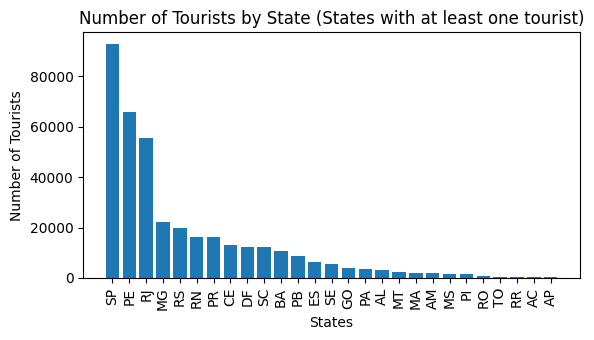

In [56]:
#Filter only the states that sent at least one tourist.
turistas_por_estado = brasileiros.groupby('estado')['tur'].sum()
turistas_por_estado = turistas_por_estado[turistas_por_estado > 0]

# Sort states
turistas_por_estado = turistas_por_estado.sort_values(ascending=False)

# Find the state with the highest number of tourists
estado_mais_turistas = turistas_por_estado.index[0]
quantidade_mais_turistas = turistas_por_estado.iloc[0]

# Create a bar graph
plt.figure(figsize=(6, 3.5))
plt.bar(turistas_por_estado.index, turistas_por_estado.values)
plt.xlabel('States')
plt.ylabel('Number of Tourists')
plt.title('Number of Tourists by State (States with at least one tourist)')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()

plt.show()

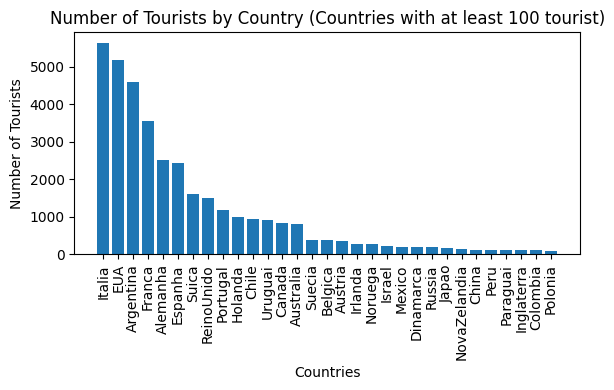

In [57]:
# Filter only the states that sent at least 100 tourist.
turistas_por_pais = estrangeiros.groupby('pais')['tur'].sum()
turistas_por_pais = turistas_por_pais[turistas_por_pais > 100]

# Sort Countries
turistas_por_pais = turistas_por_pais.sort_values(ascending=False)

# Find the state with the highest number of foreign tourists
pais_mais_turistas = turistas_por_pais.index[0]
quantidade_mais_turistas = turistas_por_pais.iloc[0]

# Create a bar graph
plt.figure(figsize=(6, 4))
plt.bar(turistas_por_pais.index, turistas_por_pais.values)
plt.xlabel('Countries')
plt.ylabel('Number of Tourists')
plt.title('Number of Tourists by Country (Countries with at least 100 tourist)')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.tight_layout()
             
plt.show()

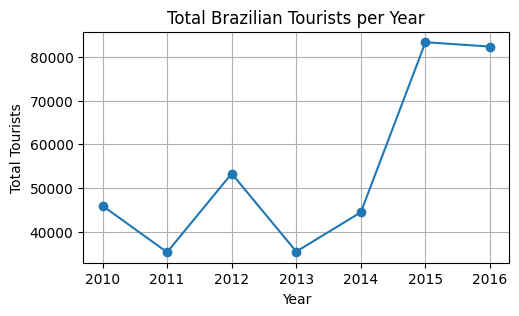

In [58]:
# Group the data by year and calculate the total tourists for each year
media_turistas_por_ano = brasil.groupby('ano')['tur'].sum()

# Create the graph
plt.figure(figsize=(5.5, 3))
plt.plot(media_turistas_por_ano.index, media_turistas_por_ano.values, marker='o', linestyle='-')
plt.title('Total Brazilian Tourists per Year')
plt.xlabel('Year')
plt.ylabel('Total Tourists')
plt.grid(True)
plt.show()

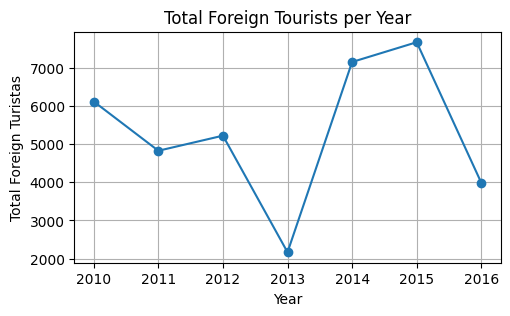

In [59]:
# Group the data by year and calculate the total foreign tourists for each year
total_turistas_por_ano_f = estrangeiros.groupby('ano')['tur'].sum()

# Create the graph
plt.figure(figsize=(5.5, 3))
plt.plot(total_turistas_por_ano_f.index, total_turistas_por_ano_f.values, marker='o', linestyle='-')
plt.title('Total Foreign Tourists per Year')
plt.xlabel('Year')
plt.ylabel('Total Foreign Turistas')
plt.grid(True)
plt.show()

/var/folders/8w/w_32s28d2jx8vh00xqr09glc0000gn/T/ipykernel_1102/1357083832.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasileiros['season'] = brasileiros['mes'].apply(get_season)


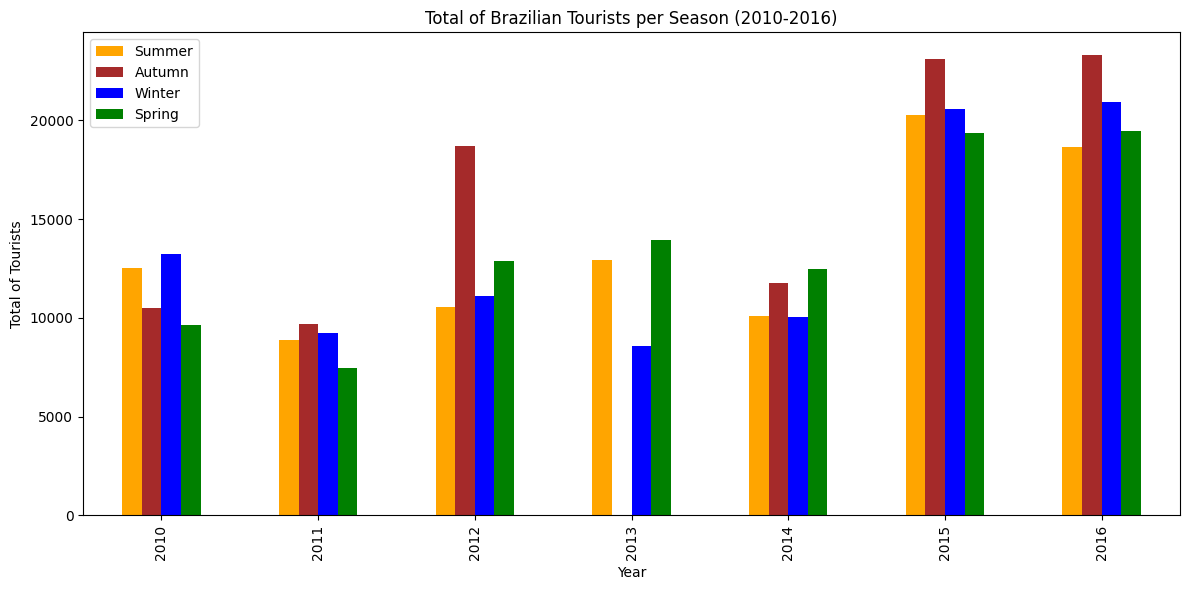

In [60]:

# Criar a coluna 'season' com base no mês
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

brasileiros['season'] = brasileiros['mes'].apply(get_season)

# Filtrar os anos de 2010 a 2016
brasileiros_filtered = brasileiros[(brasileiros['ano'] >= 2010) & (brasileiros['ano'] <= 2016)]

# Calcular a média de turistas em cada estação do ano por ano
season_tourists = brasileiros_filtered.groupby(['ano', 'season'])['tur'].sum().reset_index()

# Reorganizar os dados para o gráfico
pivot_data = season_tourists.pivot(index='ano', columns='season', values='tur')

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['orange', 'brown', 'blue', 'green']
legend_labels = ['Summer', 'Autumn', 'Winter', 'Spring']

pivot_data.plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Total of Tourists')
ax.set_title('Total of Brazilian Tourists per Season (2010-2016)')
ax.legend(legend_labels, loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/8w/w_32s28d2jx8vh00xqr09glc0000gn/T/ipykernel_1102/2548287957.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estrangeiros['season'] = estrangeiros['mes'].apply(get_season)


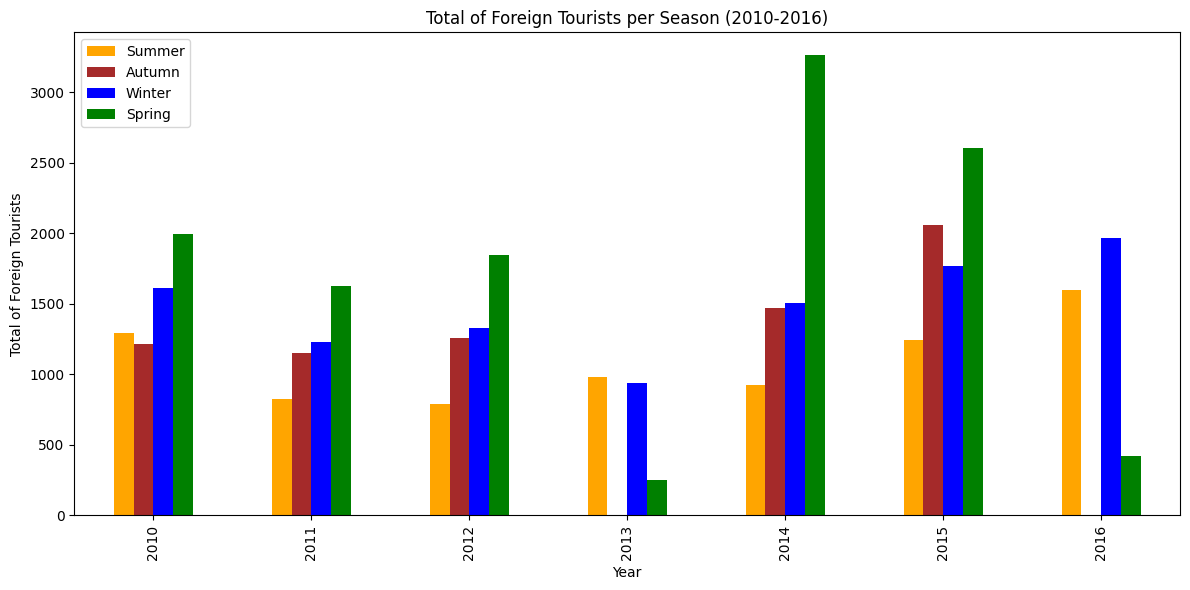

In [61]:
# Criar a coluna 'season' com base no mês
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

estrangeiros['season'] = estrangeiros['mes'].apply(get_season)

# Filtrar os anos de 2010 a 2016
estrangeiros_filtered = estrangeiros[(estrangeiros['ano'] >= 2010) & (estrangeiros['ano'] <= 2016)]

# Calcular a média de turistas em cada estação do ano por ano
season_tourists = estrangeiros_filtered.groupby(['ano', 'season'])['tur'].sum().reset_index()

# Reorganizar os dados para o gráfico
pivot_data = season_tourists.pivot(index='ano', columns='season', values='tur')

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['orange', 'brown', 'blue', 'green']
legend_labels = ['Summer', 'Autumn', 'Winter', 'Spring']

pivot_data.plot(kind='bar', color=colors, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Total of Foreign Tourists')
ax.set_title('Total of Foreign Tourists per Season (2010-2016)')
ax.legend(legend_labels, loc='upper left')

plt.tight_layout()
plt.show()

### 4.2 Homicides

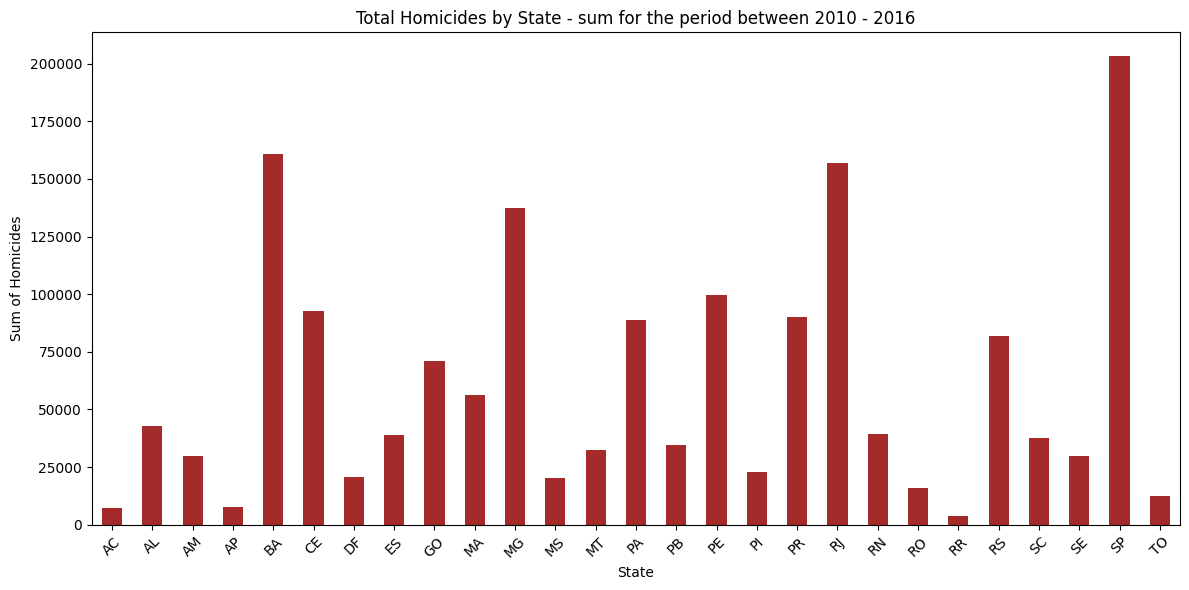

In [62]:
soma_homicidios_por_estado = brasil.groupby('estado')['hom'].sum()

# Create a bra graph
plt.figure(figsize=(12, 6))
soma_homicidios_por_estado.plot(kind='bar', color='brown')
plt.xlabel('State')
plt.ylabel('Sum of Homicides')
plt.title('Total Homicides by State - sum for the period between 2010 - 2016')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

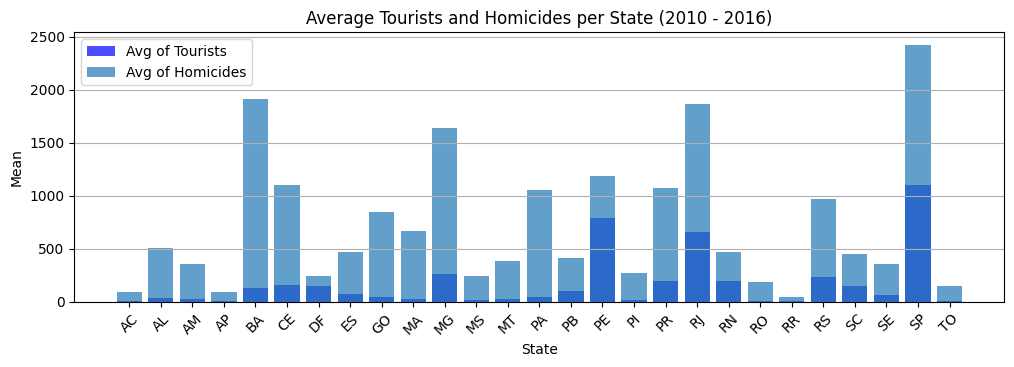

In [63]:
estatisticas_por_estado = brasil.groupby('estado').agg({'tur': 'mean', 'hom': 'mean'}).reset_index()

# Plot the averages of tourists and homicides by state
plt.figure(figsize=(12, 3.5))
plt.bar(estatisticas_por_estado['estado'], estatisticas_por_estado['tur'], label='Avg of Tourists', alpha=0.7, color = 'blue')
plt.bar(estatisticas_por_estado['estado'], estatisticas_por_estado['hom'], label='Avg of Homicides', alpha=0.7)
plt.xlabel('State')
plt.ylabel('Mean')
plt.title('Average Tourists and Homicides per State (2010 - 2016)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 4.3 Dengue

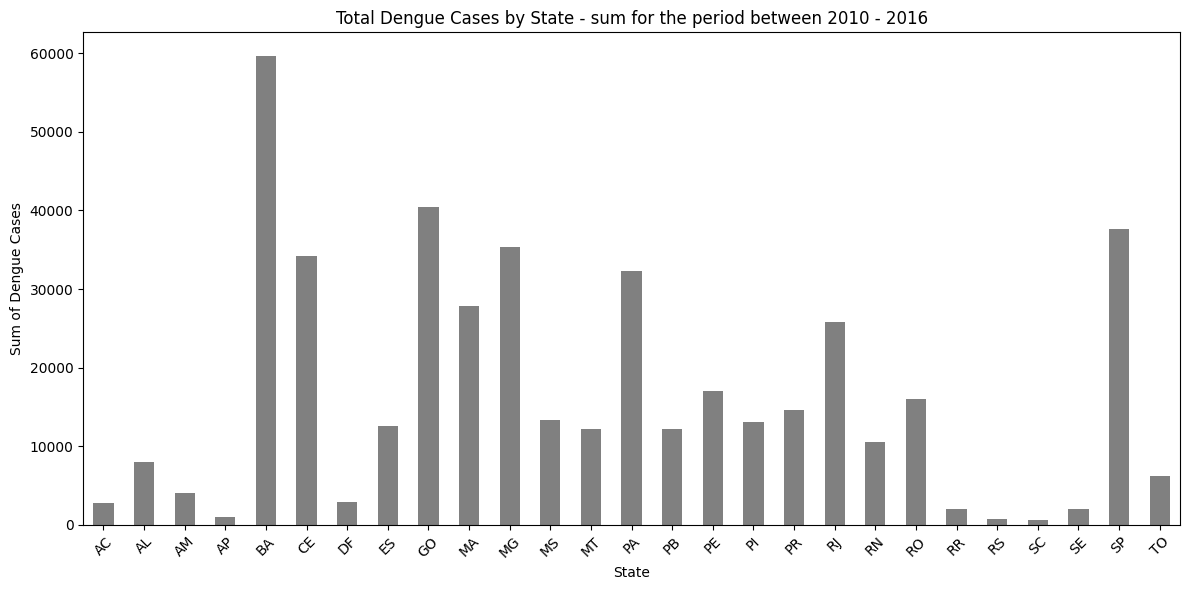

In [64]:
soma_dengue_por_estado = brasil.groupby('estado')['dengue'].sum()

# Create the bar graph
plt.figure(figsize=(12, 6))
soma_dengue_por_estado.plot(kind='bar', color='grey')
plt.xlabel('State')
plt.ylabel('Sum of Dengue Cases')
plt.title('Total Dengue Cases by State - sum for the period between 2010 - 2016')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

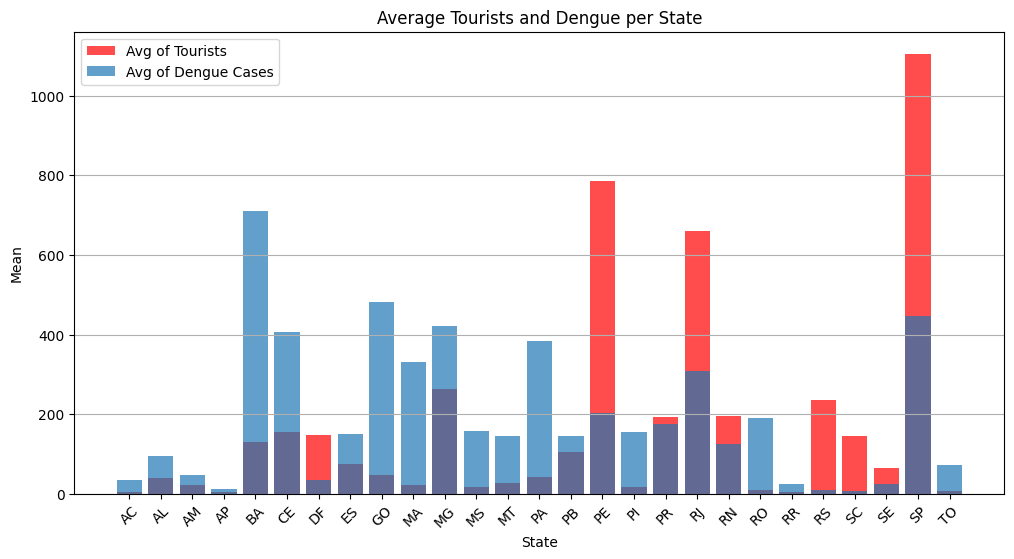

In [65]:
estatisticas_por_estado = brasil.groupby('estado').agg({'tur': 'mean', 'dengue': 'mean'}).reset_index()

# Plot the averages of tourists and dengue cases by state
plt.figure(figsize=(12, 6))
plt.bar(estatisticas_por_estado['estado'], estatisticas_por_estado['tur'], label='Avg of Tourists', alpha=0.7, color = 'red')
plt.bar(estatisticas_por_estado['estado'], estatisticas_por_estado['dengue'], label='Avg of Dengue Cases', alpha=0.7)
plt.xlabel('State')
plt.ylabel('Mean')
plt.title('Average Tourists and Dengue per State')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 4.4 GDP per Capita

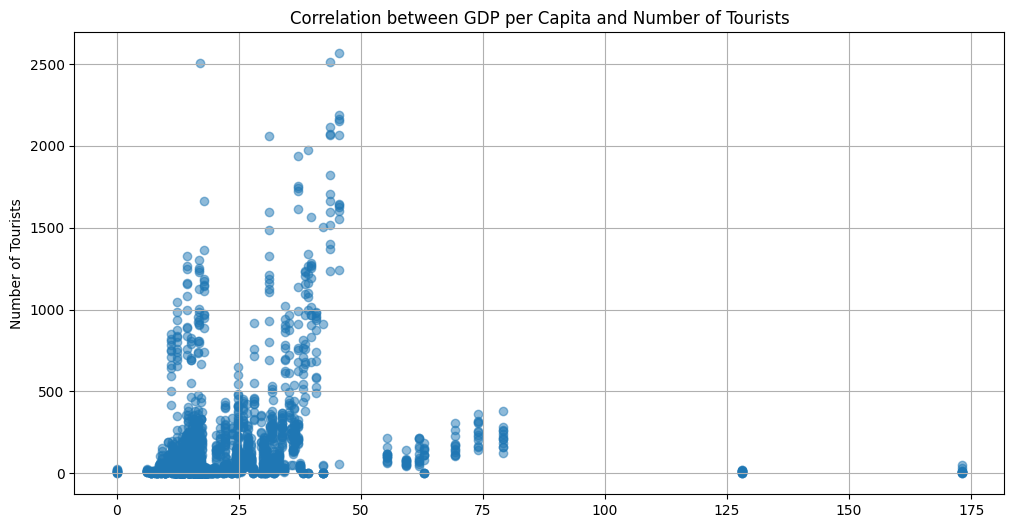

In [66]:
pib_per_capita = brasil['pibcap']
num_turistas = brasil['tur']

# Create the scatter plot
plt.figure(figsize=(12, 6))  
plt.scatter(pib_per_capita, num_turistas, alpha=0.5)
plt.ylabel('Number of Tourists')
plt.title('Correlation between GDP per Capita and Number of Tourists')

# Create the graph 
plt.grid(True) 
plt.show()

In [67]:
correlation, _ = pearsonr(brasil['pibcap'], brasil['tur'])

print("Correlation between GDP per Capita and number of tourists:", correlation)

Correlation between GDP per Capita and number of tourists: 0.16522430600636426


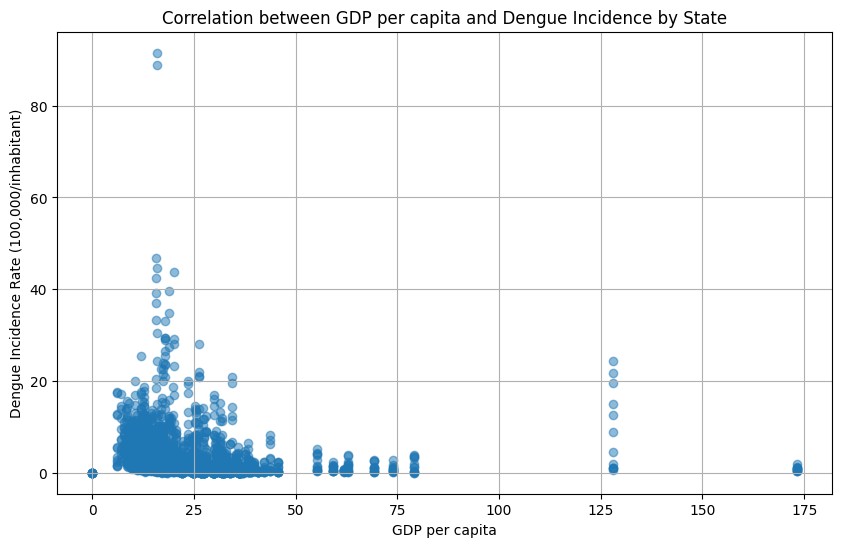

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(brasil['pibcap'], brasil['inc_dengue_hab'], alpha=0.5)
plt.title('Correlation between GDP per capita and Dengue Incidence by State')
plt.xlabel('GDP per capita')
plt.ylabel('Dengue Incidence Rate (100,000/inhabitant)')
plt.grid(True)
plt.show()

In [69]:
correlation, _ = pearsonr(brasil['pibcap'], brasil['inc_dengue_hab'])

print("Correlation between GDP per Capita and dengue incidence rate:", correlation)

Correlation between GDP per Capita and dengue incidence rate: -0.1267338293045326


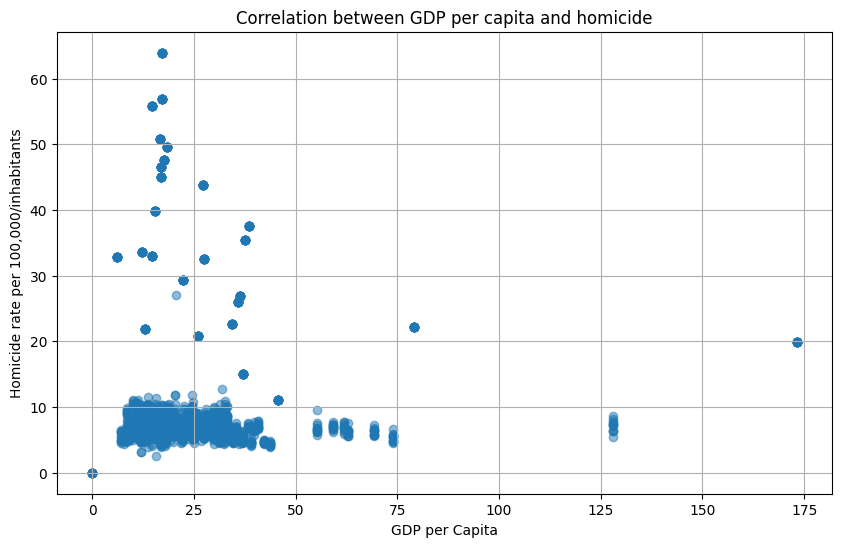

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(brasil['pibcap'], brasil['tx_hom_hab'], alpha=0.5)
plt.title('Correlation between GDP per capita and homicide')
plt.xlabel('GDP per Capita')
plt.ylabel('Homicide rate per 100,000/inhabitants')
plt.grid(True)
plt.show()

In [71]:
from scipy.stats import pearsonr
correlation, _ = pearsonr(brasil['pibcap'], brasil['tx_hom_hab'])

print("Correlation between GDP per Capita and homicide rate:", correlation)

Correlation between GDP per Capita and homicide rate: 0.021795961690306002


### 4.5 Heatmap

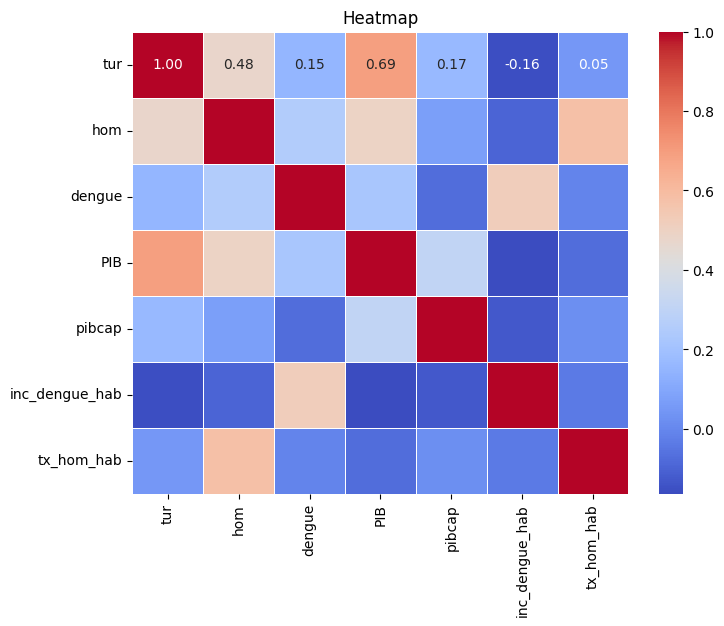

In [72]:
variaveis_numericas = ['tur', 'hom', 'dengue','PIB', 'pibcap', 'inc_dengue_hab', 'tx_hom_hab']

# Correlation Matrix
correlacao = brasil[variaveis_numericas].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap')
plt.show()

## 5. Data Preparation

In [73]:
brasilz = brasil.copy()

### 5.1 Regression

In [74]:
# model definition
lr_model = smf.ols(formula = 'tur ~ hom + dengue + PIB + pibcap', data = brasilz)

#model training (ajuste de dados)
lr_model = lr_model.fit()

# ANOVA is a statistical technique primarily used to analyze variation between groups. 
# It is often applied to test if there are significant differences between the means of multiple groups.

anova_results2 = sm.stats.anova_lm(lr_model, typ=1)
anova_results2

,df,sum_sq,mean_sq,F,PR(>F)
hom,1.0,5.185706e+07,5.185706e+07,1035.943864,1.819684e-187
dengue,1.0,2.803748e+05,2.803748e+05,5.601022,1.803377e-02
PIB,1.0,6.316960e+07,6.316960e+07,1261.933485,4.694221e-220
pibcap,1.0,3.521315e+05,3.521315e+05,7.034498,8.051261e-03
Residual,2263.0,1.132808e+08,5.005779e+04,NaN,NaN


In [75]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tur   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     577.6
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:22:30   Log-Likelihood:                -15487.
No. Observations:                2268   AIC:                         3.098e+04
Df Residuals:                    2263   BIC:                         3.101e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.0161      8.654      4.046      0.0